In [2]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt



In [1]:
class CliffWalkingEnv:
    def __init__(self, ncol, nrow):
        self.nrow = nrow
        self.ncol = ncol
        self.x = 0  # 记录当前智能体位置的横坐标
        self.y = self.nrow - 1  # 记录当前智能体位置的纵坐标

    def step(self, action):  # 外部调用这个函数来改变当前位置
        # 4种动作, change[0]:上, change[1]:下, change[2]:左, change[3]:右。坐标系原点(0,0)
        # 定义在左上角
        change = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self.x = min(self.ncol - 1, max(0, self.x + change[action][0]))
        self.y = min(self.nrow - 1, max(0, self.y + change[action][1]))
        next_state = self.y * self.ncol + self.x
        reward = -1
        done = False
        if self.y == self.nrow - 1 and self.x > 0:  # 下一个位置在悬崖或者目标
            done = True
            if self.x != self.ncol - 1:
                reward = -100
        return next_state, reward, done

    def reset(self):  # 回归初始状态,坐标轴原点在左上角
        self.x = 0
        self.y = self.nrow - 1
        return self.y * self.ncol + self.x

In [8]:
class Sarsa:

    def __init__(self, col, row, learning_rate, gamma, epsilon, action_num = 4):
        self.Q_table = np.zeros([col*row, action_num])
        self.action_num = action_num
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon

    def take_action(self, state):
        if np.random.random() < self.epsilon:
            action = np.random.randint(self.action_num)
        else:
            action = np.argmax(self.Q_table[state])
        return action
    
    def get_policy(self, state):
        Q_max = np.argmax(self.Q_table[state])
        a = [0 for i in range(self.action_num)]
        for i in range(self.action_num):
            if self.Q_table[state, i] == Q_max:
                a[i] = 1
        return a
    
    def sarsa_update(self, s0, a0, r, s1, a1):
        td_error = r + self.gamma * self.Q_table[s1, a1] - self.Q_table[s0, a0]
        self.Q_table[s0, a0] += self.learning_rate * td_error



In [28]:
col = 12
row = 4
env = CliffWalkingEnv(col, row)
np.random.seed(0)
epsilon = 0.1
learning_rate = 0.1
gamma = 0.9
agent = Sarsa(col, row, learning_rate, gamma, epsilon)

num_episodes = 500

Iteration 9: 100%|██████████| 50/50 [00:00<00:00, 1562.73it/s, episode=500, return=-18.900]


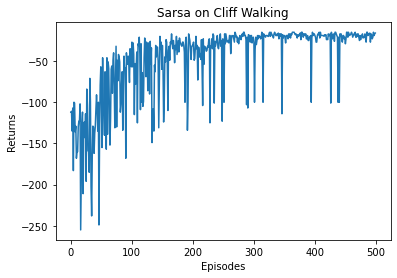